# ***K-Means Clustering***

## **Pengertian *K-Means Clustering***
**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang paling populer untuk melakukan clustering atau pengelompokan data. Tujuan dari algoritma ini adalah membagi sekumpulan data ke dalam beberapa kelompok (kluster) berdasarkan kemiripan atau kedekatan karakteristik.

## **Manfaat *K-Means Clustering***
**1. Segmentasi Pelanggan**

  Digunakan oleh perusahaan untuk mengelompokkan pelanggan berdasarkan perilaku, preferensi, atau pola pembelian. Hal ini membantu dalam menyusun strategi pemasaran yang lebih tepat sasaran.

**2. Pengelompokan Data Secara Otomatis**

  K-Means membantu dalam mengorganisasi dan menganalisis data besar dengan cara mengelompokkannya berdasarkan kemiripan tanpa perlu label atau klasifikasi sebelumnya.

**3. Analisis Citra dan Pengolahan Gambar**

  Digunakan dalam kompresi gambar dan segmentasi citra, misalnya memisahkan objek dari latar belakang dalam gambar berdasarkan warna atau tekstur.

**4. Deteksi Anomali**

  Membantu mengidentifikasi data yang tidak sesuai dengan pola umum dalam kluster, seperti mendeteksi transaksi mencurigakan dalam sistem keuangan.

**5. Pengelompokan Dokumen atau Teks**

  K-Means digunakan dalam pengolahan bahasa alami untuk mengelompokkan dokumen dengan topik atau tema yang serupa, contohnya dalam sistem rekomendasi berita.

**6. Optimalisasi Sistem Rekomendasi**

  Dengan mengetahui kelompok pengguna yang memiliki preferensi serupa, sistem bisa merekomendasikan produk atau konten yang lebih relevan.

**7. Pengambilan Keputusan yang Lebih Baik**

  Dengan informasi yang terkelompok secara logis, organisasi dapat membuat keputusan bisnis yang lebih cerdas dan berbasis data.

## **Langkah-langkah Umum K-Means:**
1. Tentukan jumlah kluster (k) yang diinginkan.

2. Pilih secara acak k buah centroid awal.

3. Kelompokkan setiap titik data ke kluster dengan centroid terdekat (berdasarkan jarak, misalnya Euclidean Distance).

4. Hitung ulang posisi centroid berdasarkan rata-rata posisi titik-titik dalam masing-masing kluster.

5. Ulangi langkah 3 dan 4 hingga posisi centroid tidak berubah secara signifikan atau jumlah iterasi maksimal tercapai.

## **Kesimpulan**
K-Means Clustering merupakan algoritma pengelompokan yang kuat dan efisien untuk menemukan struktur dalam data tanpa label. Meskipun sederhana, algoritma ini sangat berguna dalam banyak aplikasi dunia nyata. Namun, keberhasilannya sangat bergantung pada pemilihan jumlah kluster yang tepat dan distribusi data yang sesuai. Oleh karena itu, penting untuk melakukan evaluasi dan validasi saat menggunakan metode ini.

## **Inertia (Sum Square error/SSE)**

**Inertia atau Sum of Squared Error (SSE)** adalah metrik yang digunakan untuk mengukur seberapa baik data dalam sebuah kluster dikelompokkan oleh algoritma K-Means.

**Inertia didefinisikan sebagai:**

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**

Silhouette Analysis memberikan nilai koefisien Silhouette (Silhouette Coefficient) untuk setiap titik data, yang menunjukkan tingkat kesesuaian data tersebut terhadap kluster yang dimilikinya.
Nilai koefisien ini berada dalam rentang –1 hingga 1.

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## **Implementasi dengan menggunakan data Iris**

In [18]:
%pip install pymysql
%pip install psycopg2

## **Library yang digunakan**

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [20]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3c7b065e-callistanovia6-e714.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_YS6MQk-gcL_QYbbL0BE",
        database="defaultdb",
        port=13412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irispostgre.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-2785e5b5-mysqllpendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_4dn925PyLTml8yy9MYL",
        database="irissql",
        port=10657
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

Kode diatas mengambil data dari dua database berbeda—PostgreSQL dan MySQL—menggunakan pustaka psycopg2 dan pymysql. Data dari masing-masing database diambil dalam bentuk DataFrame menggunakan query SQL. Kemudian, kedua DataFrame digabungkan menggunakan inner join berdasarkan kolom id dan class. Hasil penggabungan dicetak ke konsol tanpa menampilkan indeks baris.

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [21]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[ 0.17427636 -0.04456512  0.59316415  0.60801711]
 [-0.36277935  0.09276821 -1.23474986 -1.26566826]]
Akurasi (Adjusted Rand Score): 0.534

Hasil K-Means dengan 3 Klaster:
Centroids:
[[ 0.05947845 -0.16365122  0.54702936  0.60410153]
 [-0.36277935  0.09276821 -1.23474986 -1.26566826]
 [11.76886501 11.98313107  5.25277759  1.00349013]]
Akurasi (Adjusted Rand Score): 0.548

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.0567834  -0.21510995  0.23039978  0.13078764]
 [-0.36277935  0.09276821 -1.23474986 -1.26566826]
 [11.76886501 11.98313107  5.25277759  1.00349013]
 [ 0.18285837 -0.10904196  0.88304443  1.10639382]]
Akurasi (Adjusted Rand Score): 0.867


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

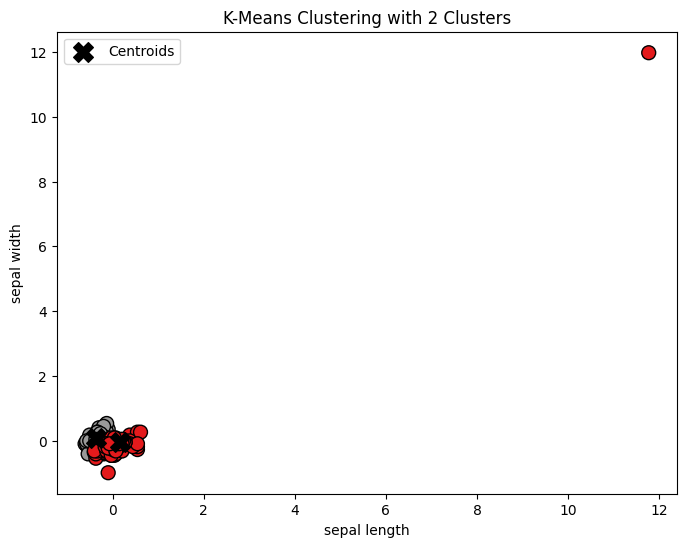

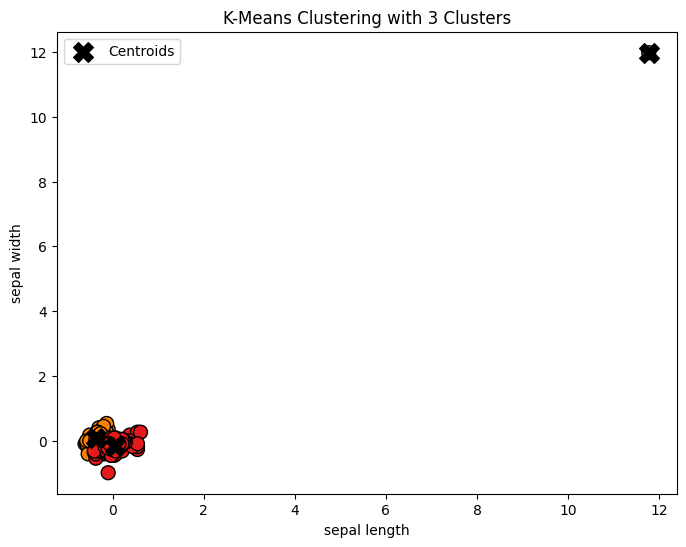

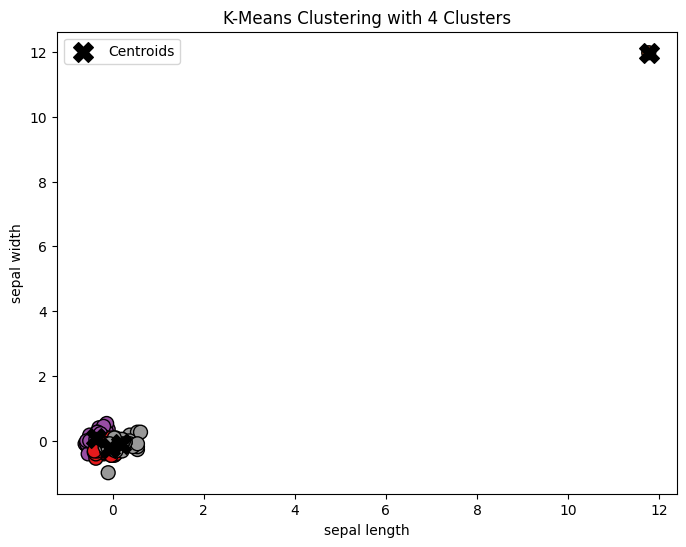

In [22]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [23]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[ 0.17427636 -0.04456512  0.59316415  0.60801711]
 [-0.36277935  0.09276821 -1.23474986 -1.26566826]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [-0.33173802  0.12564227 -1.26855007 -1.3237165 ]), Klaster: 1, Centroid: [-0.36277935  0.09276821 -1.23474986 -1.26566826], Jarak kuadrat: 0.007, Inertia sementara: 0.007
Titik data 2 (Fitur: [11.76886501 11.98313107  5.25277759  1.00349013]), Klaster: 0, Centroid: [ 0.17427636 -0.04456512  0.59316415  0.60801711], Jarak kuadrat: 300.968, Inertia sementara: 300.975
Titik data 3 (Fitur: [-0.46694028 -0.00859346 -1.32030664 -1.3237165 ]), Klaster: 1, Centroid: [-0.36277935  0.09276821 -1.23474986 -1.26566826], Jarak kuadrat: 0.032, Inertia sementara: 301.007
Titik data 4 (Fitur: [-0.50074085 -0.0533387  -1.2167935  -1.3237165 ]), Klaster: 1, Centroid: [-0.36277935  0.09276821 -1.23474986 -1.26566826], Jarak kuadrat: 0.044, Inertia sementara: 301.051
Ti

## **Model Plotting Diagram Elbow Method**

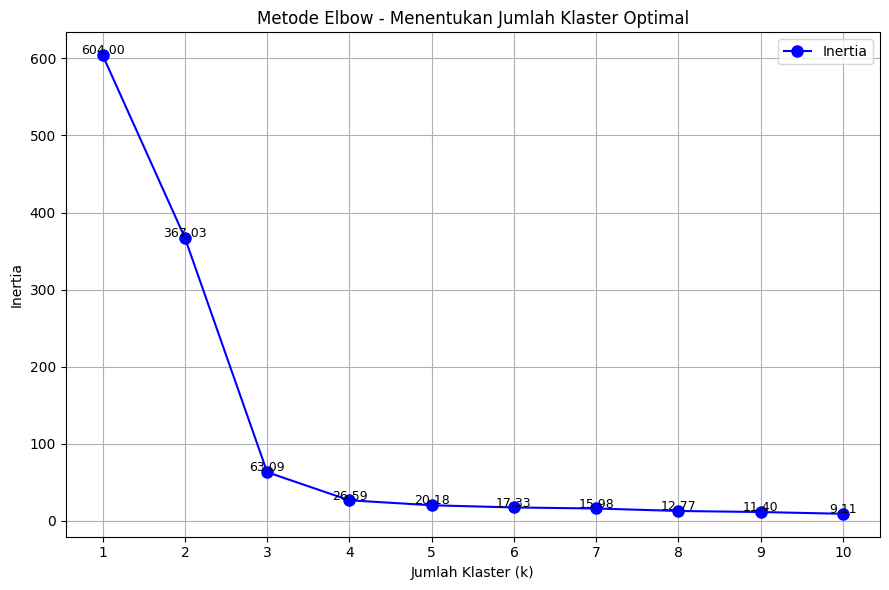

In [24]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[ 0.17427636 -0.04456512  0.59316415  0.60801711]
 [-0.36277935  0.09276821 -1.23474986 -1.26566826]]
Silhouette Score untuk 2 klaster: 0.656

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[ 0.05947845 -0.16365122  0.54702936  0.60410153]
 [-0.36277935  0.09276821 -1.23474986 -1.26566826]
 [11.76886501 11.98313107  5.25277759  1.00349013]]
Silhouette Score untuk 3 klaster: 0.698

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.0567834  -0.21510995  0.23039978  0.13078764]
 [-0.36277935  0.09276821 -1.23474986 -1.26566826]
 [11.76886501 11.98313107  5.25277759  1.00349013]
 [ 0.18285837 -0.10904196  0.88304443  1.10639382]]
Silhouette Score untuk 4 klaster: 0.604

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.698)


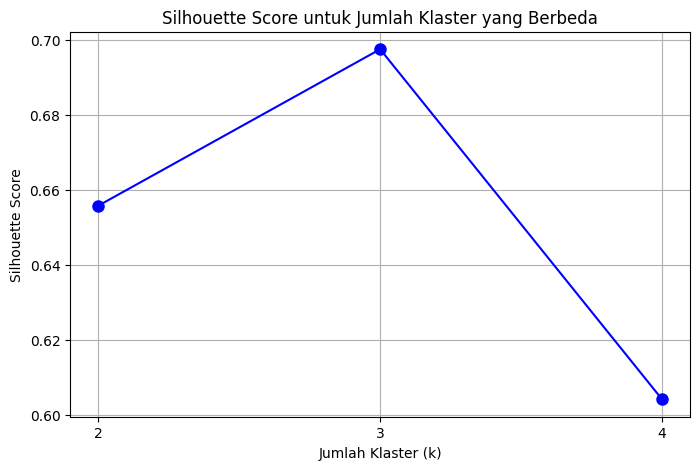

In [25]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()